# LatentSync: Audio Conditioned Latent Diffusion Models for Lip Sync

This notebook provides a comprehensive summary and a simplified implementation of the paper "LatentSync: Audio Conditioned Latent Diffusion Models for Lip Sync." The paper presents an end-to-end framework to generate lip-synced video frames using latent diffusion models, bypassing intermediate motion representations. This notebook explains the main ideas, discusses important mathematical formulas, and implements a toy diffusion process to illustrate the core concepts.

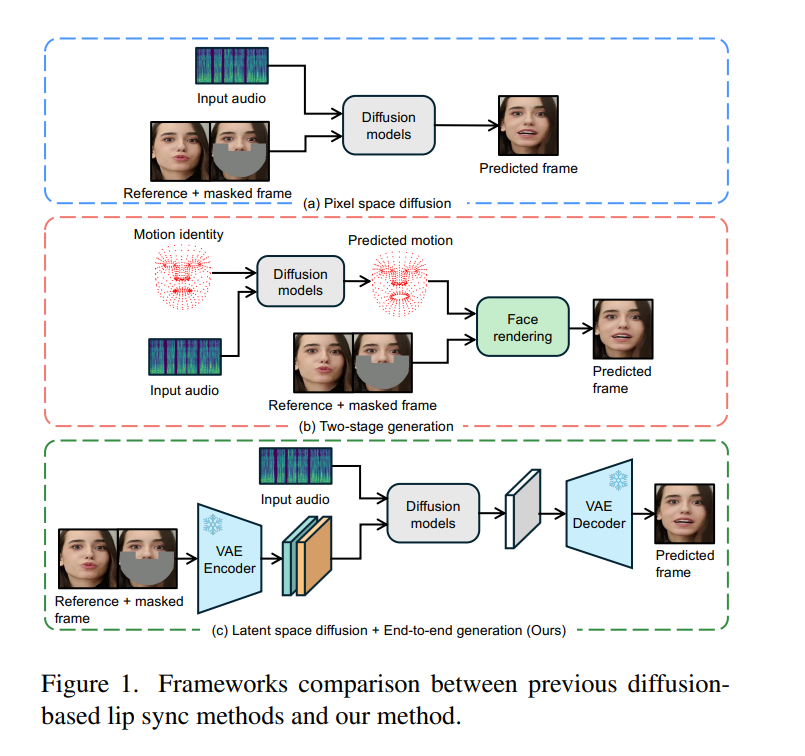

## Paper Summary

The paper *LatentSync: Audio Conditioned Latent Diffusion Models for Lip Sync* introduces a novel approach for generating lip-synced videos by leveraging latent diffusion models. Traditional methods for lip sync typically rely on intermediate representations—such as motion vectors, facial landmarks, or two-stage generation approaches—to produce the final video. In contrast, LatentSync eliminates the need for such intermediate steps by directly modeling the audio-visual correlation in the latent space using the powerful Stable Diffusion framework.

A key innovation of the paper is the introduction of Temporal Representation Alignment **(TREPA)**, which uses a large-scale self-supervised video model **(VideoMAE-v2)** to extract temporal representations from generated video frames. By aligning these temporal features with those from the ground truth frames, the method ensures high temporal consistency. This is crucial in applications such as dubbing, virtual avatars, and video conferencing, where even small inconsistencies in lip motion can break the realism of the video.

Another challenge addressed in the paper is the convergence issue of SyncNet, a network used to supervise lip-sync accuracy. The authors perform comprehensive ablation studies to understand the factors affecting SyncNet training, including the effects of batch size, number of input frames, and architectural choices. They demonstrate that pixel-space supervision (as opposed to latent space supervision) yields better convergence and lip-sync accuracy.

The training process is divided into two stages. In the first stage, the model is trained to reconstruct latent representations using a simple reconstruction loss, thereby capturing robust visual features from large batches of data. In the second stage, additional losses—including SyncNet loss, LPIPS loss for perceptual quality, and TREPA loss for temporal consistency—are added to fine-tune the model for accurate lip synchronization.

Several key mathematical formulations underpin the approach. For example, one of the central equations describes the denoising step in the latent diffusion process:

$$
\hat{z}_0 = \frac{z_t - \sqrt{1-\bar{\alpha}_t}\,\epsilon_\theta(z_t)}{\sqrt{\bar{\alpha}_t}},
$$

where $z_t$ is the noisy latent variable at time $t$, $\epsilon_\theta(z_t)$ is the predicted noise, and $\bar{\alpha}_t$ represents the cumulative noise schedule. In addition, the overall training loss is defined as a weighted sum of several components, ensuring that the network learns to produce not only visually convincing images but also temporally consistent and accurately lip-synced outputs.


>In summary, the LatentSync framework represents a significant advancement in lip-sync generation by addressing both visual quality and temporal consistency in a unified end-to-end approach. The paper’s insights into training dynamics, particularly regarding SyncNet convergence, provide valuable guidance for future research in diffusion-based generative models. For more details, you can read the original paper [here](https://arxiv.org/abs/2412.09262v1).

## Mathematical Formulations

Here are three of the central mathematical formulas presented in the paper:

1. **Denoising Step:**

   This step estimates the clean latent $\hat{z}_0$ from the noisy latent $z_t$:

   $$
   \hat{z}_0 = \frac{z_t - \sqrt{1-\bar{\alpha}_t}\,\epsilon_\theta(z_t)}{\sqrt{\bar{\alpha}_t}}
   $$

   Here, $\epsilon_\theta(z_t)$ is the model’s prediction of the noise and $\bar{\alpha}_t$ is a cumulative product of noise coefficients.

2. **Simple Reconstruction Loss:**

   The loss that guides the model to predict the added noise correctly is given by:

   $$
   L_{\text{simple}} = \mathbb{E}_{x, A, \epsilon \sim \mathcal{N}(0,1), t}\left[ \|\epsilon - \epsilon_\theta(z_t, t, \tau_\theta(A))\|^2_2 \right]
   $$

3. **Total Loss Function:**

   The overall loss is a combination of several terms:

   $$
   L_{\text{total}} = \lambda_1 L_{\text{simple}} + \lambda_2 L_{\text{sync}} + \lambda_3 L_{\text{lpips}} + \lambda_4 L_{\text{trepa}}
   $$

   Each term is responsible for a different aspect of the training—ensuring reconstruction fidelity, lip-sync accuracy, perceptual quality, and temporal consistency.

## Implementation Overview

In the code cells below, we implement a toy simulation of a latent diffusion process. This simplified example does the following:

- **Noise Addition:** Given a simple latent vector, noise is added gradually according to a noise schedule.
- **Denoising:** A dummy function simulates the model's noise prediction and performs the denoising step using the formula above.
- **Loss Computation:** A simple L2 loss is computed between the true noise and the predicted noise.
- **Visualization:** The notebook plots the original latent, the noisy version, and the denoised estimate. It also shows the loss evolution over diffusion steps.

While this implementation is highly simplified compared to the full LatentSync framework, it demonstrates the core ideas and provides a basis for further experimentation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Set random seed for reproducibility
np.random.seed(102)

##############################################
# Noise Schedule and Denoising Functions   #
##############################################

def compute_alpha_bar(t, alpha_start=0.9, alpha_end=0.1):
    """Compute the cumulative noise coefficient \(\bar{\alpha}_t\) at time t."""
    return alpha_start * (alpha_end / alpha_start) ** t

def epsilon_theta(z, t):
    """Dummy noise prediction function. In a real model, this would be a neural network."""
    # For simplicity, we return a scaled version of the input noise
    return 0.5 * z

# Denoising step using the formula:
$$ \hat{z}_0 = \frac{z_t - \sqrt{1-\bar{\alpha}_t} \cdot \epsilon_\theta(z_t)}{\sqrt{\bar{\alpha}_t}} $$




In [2]:
def denoise(z_t, t):
    alpha_bar = compute_alpha_bar(t)
    predicted_noise = epsilon_theta(z_t, t)
    z0_hat = (z_t - math.sqrt(1 - alpha_bar) * predicted_noise) / math.sqrt(alpha_bar)
    return z0_hat

def add_noise(z0, t, noise_level=1.0):
    """Add noise to the latent representation z0 based on time t."""
    alpha_bar = compute_alpha_bar(t)
    noise = np.random.normal(0, noise_level, size=z0.shape)
    z_t = math.sqrt(alpha_bar) * z0 + math.sqrt(1 - alpha_bar) * noise
    return z_t, noise

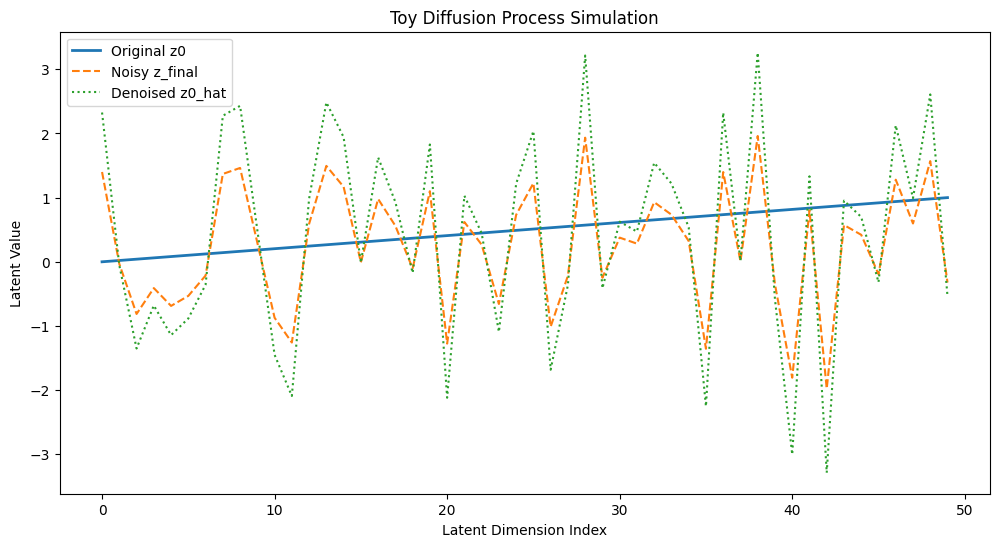

In [3]:
##############################################
# Toy Diffusion Process Simulation           #
##############################################

def simulate_diffusion_process(z0, t_steps=10):
    """Simulate the process of adding noise over multiple time steps."""
    zs = []
    noises = []
    z = z0
    for t in np.linspace(0.1, 1.0, t_steps):
        z, noise = add_noise(z, t)
        zs.append(z)
        noises.append(noise)
    return zs, noises

# Define a simple latent vector (for demonstration, a 1D array)
z0 = np.linspace(0, 1, 50)  # a latent representation with 50 points

# Simulate the diffusion process over a number of time steps
t_steps = 100
zs, noises = simulate_diffusion_process(z0, t_steps=t_steps)

# Use the final noisy latent for denoising
t_final = 1.0
z_final_noisy = zs[-1]
z0_hat = denoise(z_final_noisy, t_final)

##############################################
# Visualization of Diffusion Process         #
##############################################

plt.figure(figsize=(12, 6))
plt.plot(z0, label='Original z0', linewidth=2)
plt.plot(z_final_noisy, label='Noisy z_final', linestyle='--')
plt.plot(z0_hat, label='Denoised z0_hat', linestyle=':')
plt.title('Toy Diffusion Process Simulation')
plt.xlabel('Latent Dimension Index')
plt.ylabel('Latent Value')
plt.legend()
plt.show()

Step 1, t=0.10, Loss: 0.3602
Step 2, t=0.11, Loss: 0.3360
Step 3, t=0.12, Loss: 0.5860
Step 4, t=0.13, Loss: 0.4554
Step 5, t=0.14, Loss: 0.5285
Step 6, t=0.15, Loss: 0.4662
Step 7, t=0.15, Loss: 0.7560
Step 8, t=0.16, Loss: 0.6385
Step 9, t=0.17, Loss: 0.3916
Step 10, t=0.18, Loss: 0.5624
Step 11, t=0.19, Loss: 0.2742
Step 12, t=0.20, Loss: 0.4004
Step 13, t=0.21, Loss: 0.4968
Step 14, t=0.22, Loss: 0.3916
Step 15, t=0.23, Loss: 0.5064
Step 16, t=0.24, Loss: 0.3970
Step 17, t=0.25, Loss: 0.5149
Step 18, t=0.25, Loss: 0.5389
Step 19, t=0.26, Loss: 0.4890
Step 20, t=0.27, Loss: 0.4827
Step 21, t=0.28, Loss: 0.5933
Step 22, t=0.29, Loss: 0.4411
Step 23, t=0.30, Loss: 0.4711
Step 24, t=0.31, Loss: 0.3422
Step 25, t=0.32, Loss: 0.3932
Step 26, t=0.33, Loss: 0.5950
Step 27, t=0.34, Loss: 0.4079
Step 28, t=0.35, Loss: 0.3284
Step 29, t=0.35, Loss: 0.3100
Step 30, t=0.36, Loss: 0.4104
Step 31, t=0.37, Loss: 0.3062
Step 32, t=0.38, Loss: 0.3848
Step 33, t=0.39, Loss: 0.3277
Step 34, t=0.40, Lo

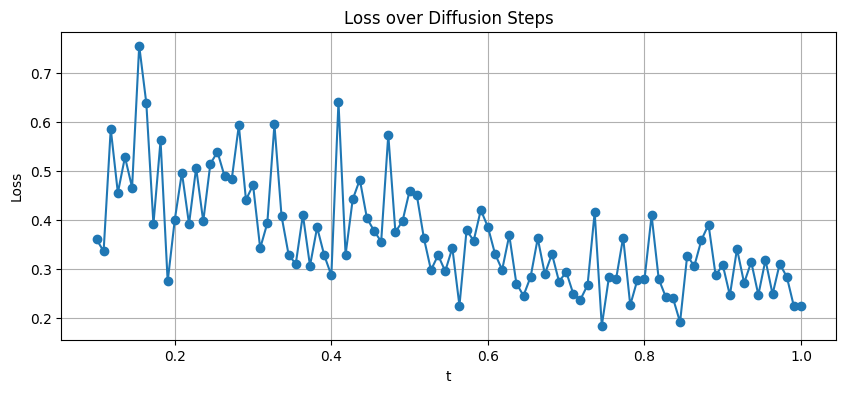

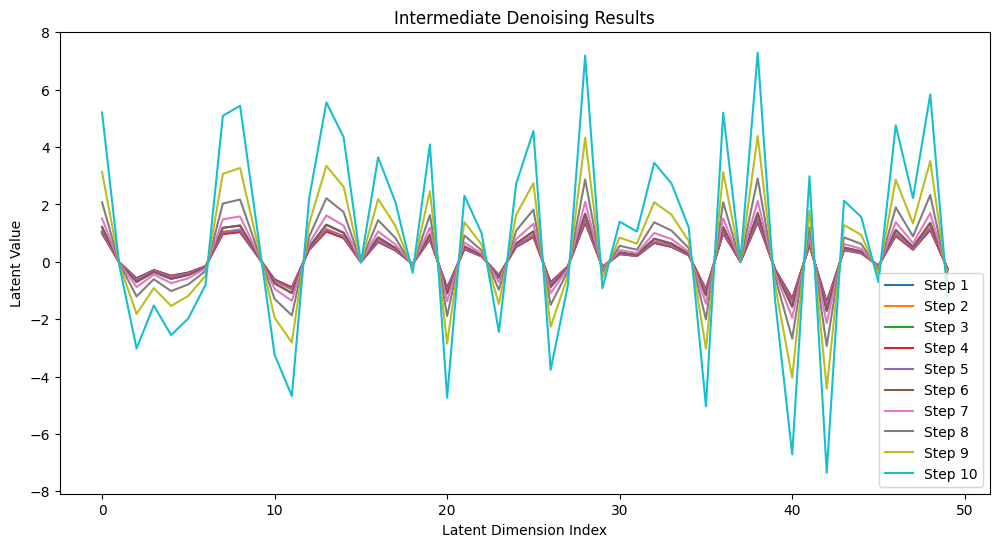

In [4]:
# Additional experiments: Loss computation and multi-step denoising

def compute_loss(true_noise, z_t, t):
    """Compute a simple L2 loss between the true noise and the predicted noise."""
    pred_noise = epsilon_theta(z_t, t)
    loss = np.mean((true_noise - pred_noise) ** 2)
    return loss

# Compute loss at each diffusion step
losses = []
t_values = np.linspace(0.1, 1.0, t_steps)
for idx, t in enumerate(t_values):
    z_t, true_noise = add_noise(z0, t)
    loss = compute_loss(true_noise, z_t, t)
    losses.append(loss)
    print(f"Step {idx+1}, t={t:.2f}, Loss: {loss:.4f}")

# Plot loss evolution over the diffusion steps
plt.figure(figsize=(10, 4))
plt.plot(t_values, losses, marker='o')
plt.title('Loss over Diffusion Steps')
plt.xlabel('t')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

def multi_step_denoise(z_noisy, t_steps):
    """Perform a multi-step denoising process on the noisy latent representation."""
    intermediate_denoised = []
    z = z_noisy
    for t in np.linspace(0.1, 1.0, t_steps):
        z = denoise(z, t)
        intermediate_denoised.append(z)
    return intermediate_denoised

# Apply multi-step denoising to the final noisy latent
intermediate_results = multi_step_denoise(z_final_noisy, t_steps=10)

# Plot intermediate denoising results
plt.figure(figsize=(12, 6))
for i, z_intermediate in enumerate(intermediate_results):
    plt.plot(z_intermediate, label=f'Step {i+1}')
plt.title('Intermediate Denoising Results')
plt.xlabel('Latent Dimension Index')
plt.ylabel('Latent Value')
plt.legend()
plt.show()

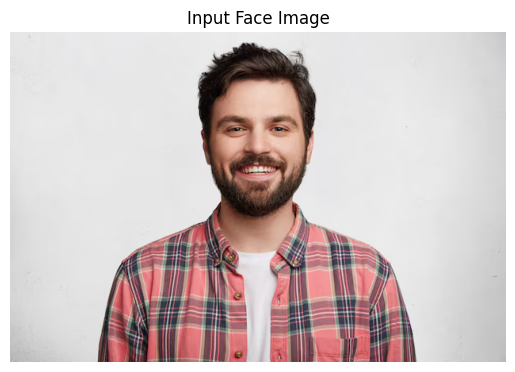

In [5]:
from PIL import Image
import cv2

def load_and_align_image(image_path):
    # Load image using OpenCV or PIL
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

face_image = load_and_align_image('/content/person.png')
plt.imshow(face_image)
plt.title("Input Face Image")
plt.axis('off')
plt.show()


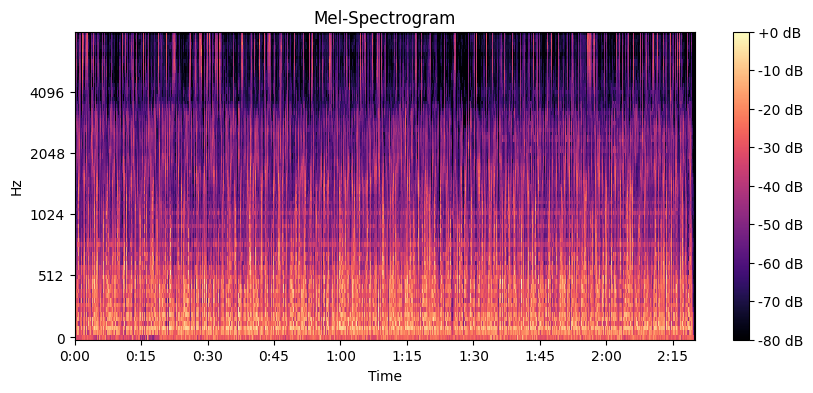

In [6]:
import librosa

def load_audio(audio_path, sr=16000):
    try:
        y, sr = librosa.load(audio_path, sr=sr)
        if y is None or len(y) == 0:
            raise ValueError("Loaded audio signal is empty")
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=80)
        return y, mel_spec
    except Exception as e:
        print("Error loading audio:", e)
        return None, None

audio, mel_spec = load_audio('/content/audio.mp3')
if audio is None:
    print("Audio loading failed. Please check the file path and format.")
else:
    import matplotlib.pyplot as plt
    import librosa.display
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), sr=16000, x_axis='time', y_axis='mel')
    plt.title("Mel-Spectrogram")
    plt.colorbar(format='%+2.0f dB')
    plt.show()


In [ ]:
#!git clone https://github.com/bytedance/LatentSync.git
#%cd LatentSync
!bash setup_env.sh


### Now to combine them we should follow the instructions on the [Github page](https://github.com/bytedance/LatentSync)

I tried to run it here in Colab but I could not get it to work here.

The idea is to run this code and execute the inference.py, located in scripts folder of LatentSync - LatentSync/scripts/inference.py

Another solution is to run it with Wav2Lip.
I have both solutions below, but they shall be ran outside of Colab (or by someone with more knowledge of Colab :D)

In [ ]:
import subprocess
from IPython.display import Video

def run_latentsync_inference(face_img_path, audio_path,
                             checkpoint_path="/content/LatentSync/checkpoints/latentsync_unet.pt",
                             syncnet_checkpoint_path="/content/LatentSync/checkpoints/latentsync_syncnet.pt",
                             output_path="/content/output_lipsynced_video.mp4",
                             working_dir="/content/LatentSync"):
    command = [
        "python", "scripts/inference.py",
        "--checkpoint_path", checkpoint_path,
        "--syncnet_checkpoint_path", syncnet_checkpoint_path,
        "--face", face_img_path,
        "--audio", audio_path,
        "--outfile", output_path
    ]
    result = subprocess.run(command, capture_output=True, text=True, cwd=working_dir)
    print("STDOUT:\n", result.stdout)
    print("STDERR:\n", result.stderr)
    if result.returncode != 0:
        raise subprocess.CalledProcessError(result.returncode, command, output=result.stdout, stderr=result.stderr)
    return output_path

result_video_path = run_latentsync_inference("/content/person.png", "/content/audio.mp3")
Video(result_video_path, embed=True)

Here is the second solution

In [ ]:
# Step 1: Clone the repo
!git clone https://github.com/Rudrabha/Wav2Lip.git
%cd Wav2Lip
!pip install -r requirements.txt

# Step 2: Download the pretrained checkpoint as per the repository instructions
# You can download the checkpoint manually from the provided link in the repository's README,
# then place it in the 'checkpoints' folder (e.g., 'checkpoints/wav2lip_gan.pth').

# Step 3: Run the Wav2Lip inference using a subprocess call.
import subprocess
from IPython.display import Video

def wav2lip_inference(face_img_path, audio_path, checkpoint_path="checkpoints/wav2lip_gan.pth", output_path="/content/output_lipsynced_video.mp4"):
    """
    Runs the Wav2Lip inference script and returns the path to the generated video.

    face_img_path: Path to the input face image or video.
    audio_path: Path to the input audio file.
    checkpoint_path: Path to the pretrained Wav2Lip checkpoint.
    output_path: Path where the output video will be saved.
    """
    command = [
        "python", "inference.py",
        "--checkpoint_path", checkpoint_path,
        "--face", face_img_path,
        "--audio", audio_path,
        "--outfile", output_path
    ]
    subprocess.run(command, check=True)
    return output_path

# Step 4: Use the function with proper paths.
result_video_path = wav2lip_inference("/content/person.png", "audio.wav")

# Step 5: Display the output video in the notebook.
Video(result_video_path, embed=True)
